# 8. Portfolio Distribution Visualization
This notebook visualizes the distribution of stations across the different behavioral segments.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# --- FIXED PATHING ---
SCRIPT_DIR = Path().resolve()
PROJECT_ROOT = SCRIPT_DIR.parent 
input_path = PROJECT_ROOT / 'Data' / 'Processed Datasets' / 'station_behavior_segments.csv'
save_path = PROJECT_ROOT / 'Results' / 'portfolio_distribution.png'

print("Generating final portfolio visualization...")

if not input_path.exists():
    print(f"Error: {input_path} not found. Run the segmentation script first!")
    # exit() # Commented out for notebook

Generating final portfolio visualization...


SUCCESS: Chart saved to: C:\Users\Siddharth\Desktop\DIVVY PROJECT\Results\portfolio_distribution.png


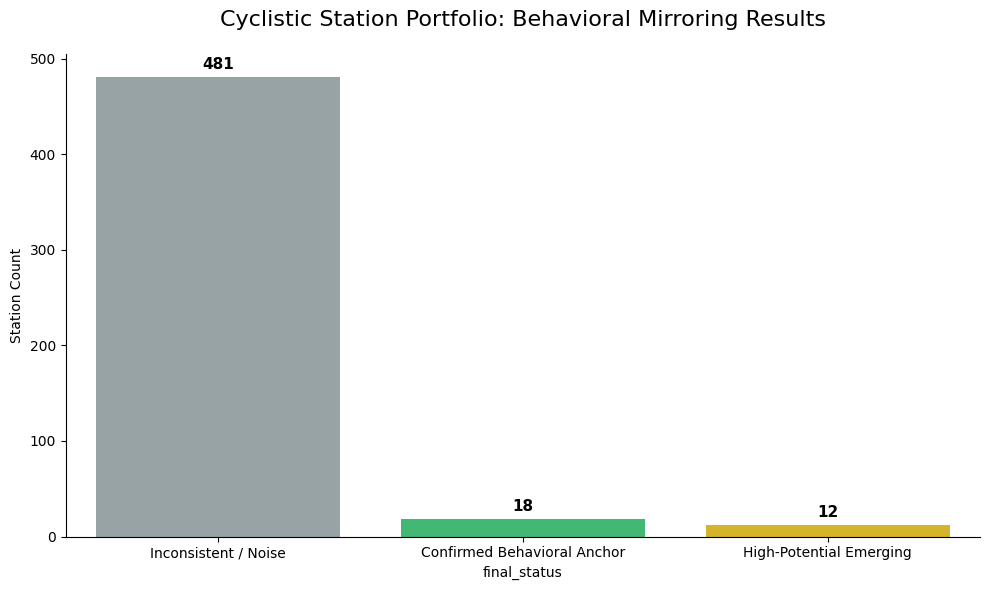

In [2]:
if input_path.exists():
    df = pd.read_csv(input_path)

    # --- Plotting ---
    plt.figure(figsize=(10, 6))
    palette = {"Confirmed Behavioral Anchor": "#2ecc71", "High-Potential Emerging": "#f1c40f", "Inconsistent / Noise": "#95a5a6"}

    ax = sns.countplot(
        data=df, x="final_status", hue="final_status",
        order=df["final_status"].value_counts().index,
        palette=palette, legend=False
    )

    # Add value labels
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 9), textcoords='offset points',
                        fontsize=11, fontweight='bold')

    plt.title("Cyclistic Station Portfolio: Behavioral Mirroring Results", fontsize=16, pad=20)
    plt.ylabel("Station Count")
    sns.despine()
    plt.tight_layout()

    save_path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(save_path, dpi=300)
    print(f"SUCCESS: Chart saved to: {save_path}")